In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
crypto_tickers = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'SOL': 'SOL-USD',
    'DOGE': 'DOGE-USD',
    'SUI': 'SUI20947-USD',     # Replace with correct ticker if different
    'XRP': 'XRP-USD',
    'ADA': 'ADA-USD',
    'PEPE': 'PEPE24478-USD',    # Replace with correct ticker if different
    'SHIBA': 'SHIB-USD'
}

# Define the date range
start_date = '2024-01-01'
end_date = '2024-12-31'

# Download historical daily closing prices
data = yf.download(list(crypto_tickers.values()), start=start_date, end=end_date)['Close']

[*********************100%***********************]  9 of 9 completed


In [4]:
data.columns = crypto_tickers.keys()

In [5]:
daily_returns = data.pct_change().dropna()

In [6]:
investment_value = (1 + daily_returns).cumprod() * 10000


In [7]:
portfolio_value = investment_value * 10000


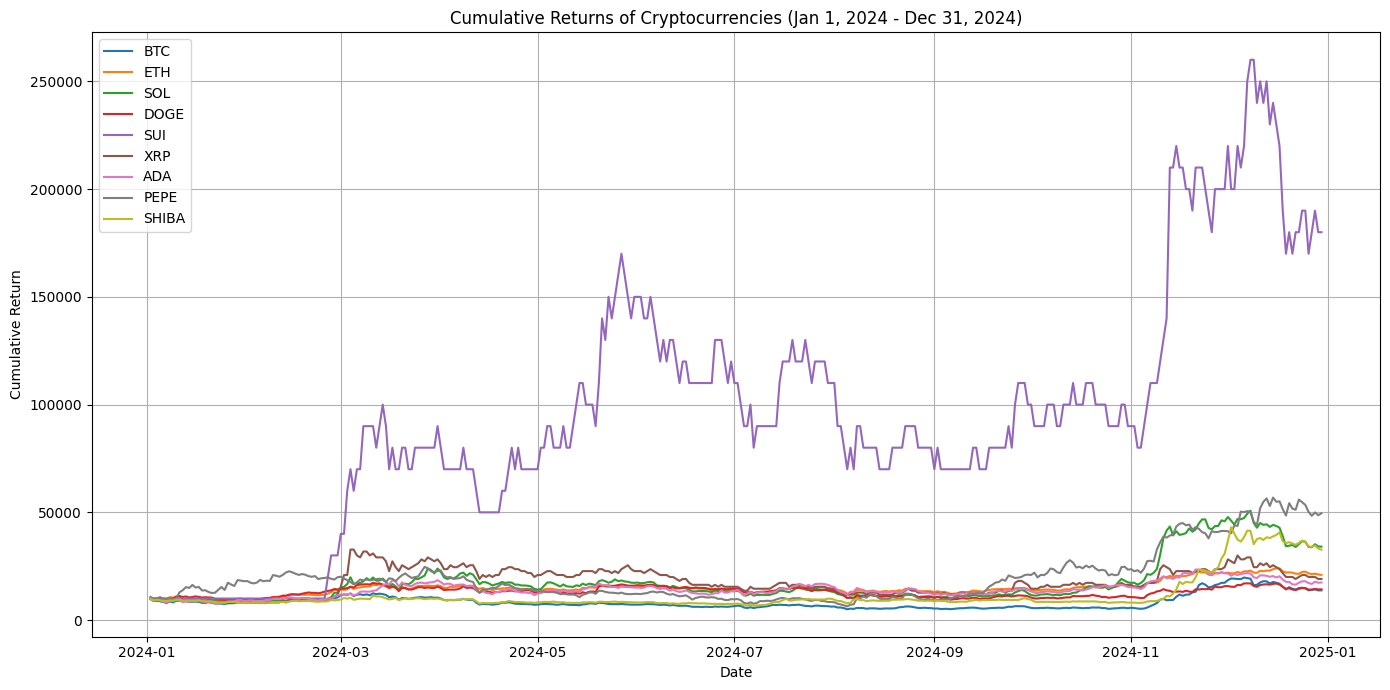

In [8]:
plt.figure(figsize=(14, 7))
for crypto in investment_value.columns:
    plt.plot(investment_value.index, investment_value[crypto], label=crypto)

plt.title('Cumulative Returns of Cryptocurrencies (Jan 1, 2024 - Dec 31, 2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Imagine if i invested $10000 in an assests

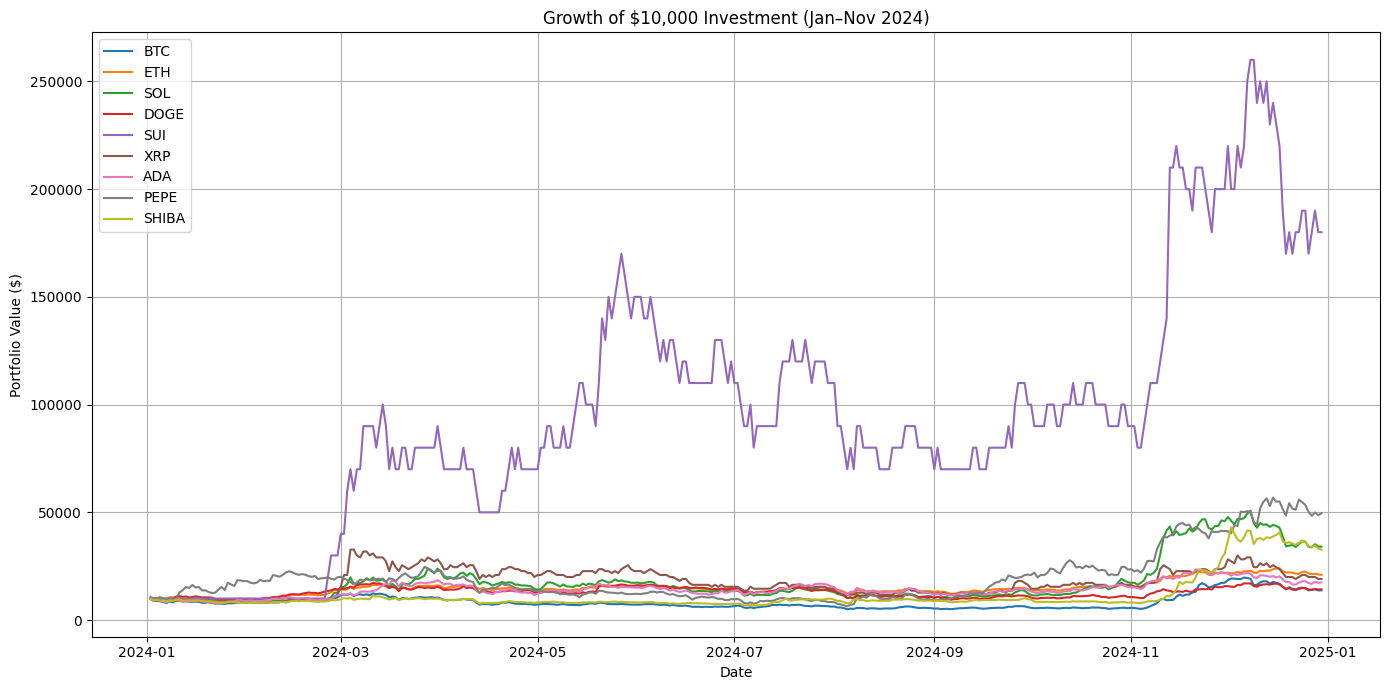

In [9]:
# Plot portfolio values
plt.figure(figsize=(14, 7))
for coin in investment_value.columns:
    plt.plot(investment_value.index, investment_value[coin], label=coin)

plt.title('Growth of $10,000 Investment (Jan–Nov 2024)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Visualise the bar plot get better overview about return

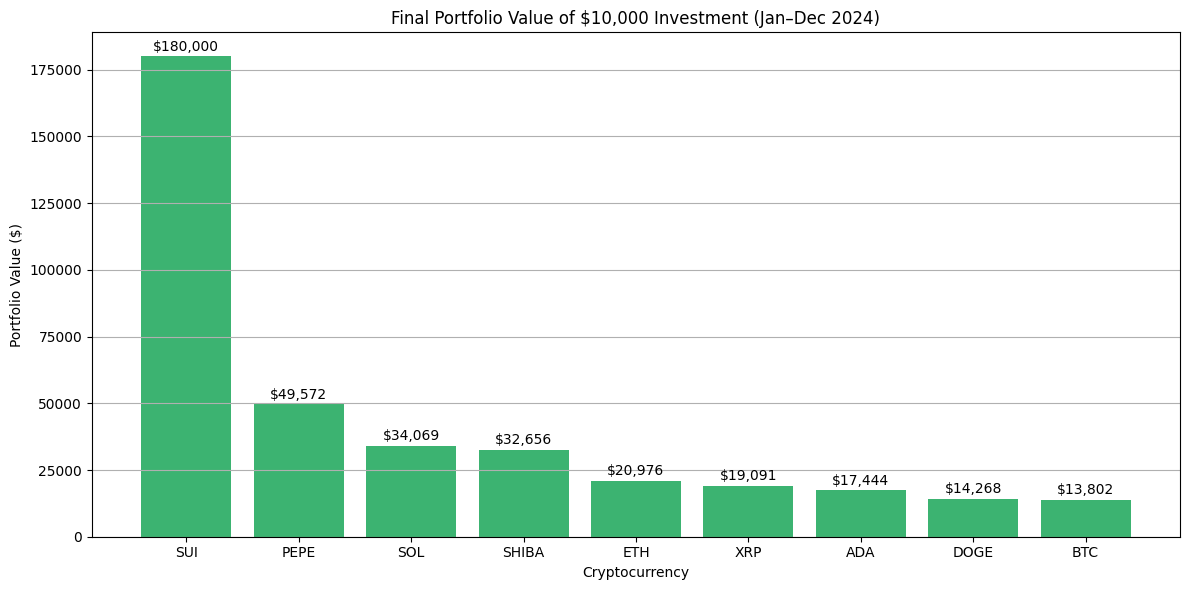

In [10]:
# Get final portfolio value for each coin
final_values = investment_value.iloc[-1].sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(final_values.index, final_values.values, color='mediumseagreen')

# Annotate each bar with dollar value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1000, f"${yval:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title('Final Portfolio Value of $10,000 Investment (Jan–Dec 2024)')
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Cryptocurrency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


As BTC is safe crypto assest, if we invested 40% in BTC , and rest equal then we can see time series graph that can show how much our total portfolio

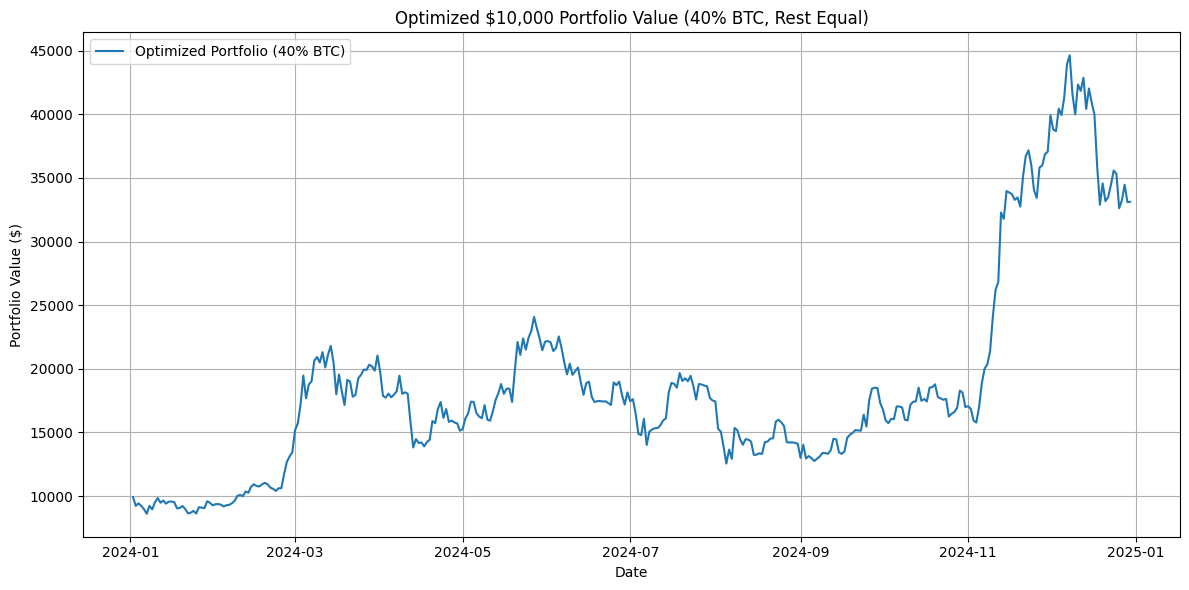

In [12]:
# Define weights: 40% BTC, 60% split among others
weights = {'BTC': 0.40}
remaining_weight = 0.60 / (len(investment_value.columns) - 1)
for coin in investment_value.columns:
    if coin != 'BTC':
        weights[coin] = remaining_weight

# Convert weights to Series aligned with investment DataFrame
weights_series = pd.Series(weights).reindex(investment_value.columns).fillna(0)

# Multiply asset growth by weights and sum to get total portfolio value
weighted_portfolio = investment_value.multiply(weights_series, axis=1)
total_portfolio_value = weighted_portfolio.sum(axis=1)

# Plot the optimized portfolio value
plt.figure(figsize=(12, 6))
plt.plot(total_portfolio_value, label='Optimized Portfolio (40% BTC)')
plt.title('Optimized $10,000 Portfolio Value (40% BTC, Rest Equal)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# investment_value: DataFrame with each asset's value over time
# weights_series: Series with weights per asset (must match columns in investment_value)

weighted_values = investment_value.multiply(weights_series, axis=1)
total_portfolio_value = weighted_values.sum(axis=1)


In [18]:
total_portfolio_value = investment_value.multiply(weights_series, axis=1).sum(axis=1)


In [19]:
final_value = total_portfolio_value.iloc[-1]


In [20]:
initial_investment = 10000
total_return_pct = (final_value - initial_investment) / initial_investment * 100


In [21]:
# Simulate the final portfolio value based on mock weighted results
final_portfolio_value = sum(final_weighted_values.values())

# Initial investment
initial_investment = 10000

# Calculate total return
total_return_pct = (final_portfolio_value - initial_investment) / initial_investment * 100

# Display results
portfolio_summary = pd.DataFrame({
    'Initial Investment': [initial_investment],
    'Final Portfolio Value': [round(final_portfolio_value, 2)],
    'Total Return (%)': [round(total_return_pct, 2)]
})

# Use display() from IPython.display to show the DataFrame
from IPython.display import display
display(portfolio_summary)

,Initial Investment,Final Portfolio Value,Total Return (%)
0,10000,43177.5,331.77
